<a href="https://colab.research.google.com/github/Geriys/VKirillV/blob/main/nash_dom2-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Получение всех объектов

In [ ]:
import requests
import json

offset_ = 0
limit_ = 500
all_objects = []

while True:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    tries = 5
    while True:
        response = requests.get(url)
        if response.ok:
            print(f'Страница получена! limit: {limit_}, offset: {offset_}')
            break
        tries -= 1
        print(f'Ошибка: {response.status}.')
        print(f'Осталось попыток {tries}.')
        time.sleep(1 * tries)
        if tries <= 0:
            raise Exception('too_many_tries')

    data_list = response.json().get('data', {}).get('list', [])
    print(len(data_list))
    if len(data_list) == 0: # прерываемся, если получили пустой массив
        break
    all_objects += data_list
    offset_ += limit_

json_str = json.dumps(all_objects)
open('all_objects.json', 'w').write(json_str)

Страница получена! limit: 500, offset: 0
500
Страница получена! limit: 500, offset: 500
500
Страница получена! limit: 500, offset: 1000
500
Страница получена! limit: 500, offset: 1500
500
Страница получена! limit: 500, offset: 2000
500
Страница получена! limit: 500, offset: 2500
500
Страница получена! limit: 500, offset: 3000
500
Страница получена! limit: 500, offset: 3500
500
Страница получена! limit: 500, offset: 4000
500
Страница получена! limit: 500, offset: 4500
500
Страница получена! limit: 500, offset: 5000
500
Страница получена! limit: 500, offset: 5500
500
Страница получена! limit: 500, offset: 6000
500
Страница получена! limit: 500, offset: 6500
500
Страница получена! limit: 500, offset: 7000
500
Страница получена! limit: 500, offset: 7500
500
Страница получена! limit: 500, offset: 8000
500
Страница получена! limit: 500, offset: 8500
500
Страница получена! limit: 500, offset: 9000
500
Страница получена! limit: 500, offset: 9500
500
Страница получена! limit: 500, offset: 10000

20749485

In [29]:
print(len(all_objects))

11717


In [4]:
import json
f = open('all_objects.json')
t = f.read()
#print(t)
all_objects = json.loads(t)
print(len(all_objects))

11717


In [5]:
# Создаем таблицу DataFrame из всех полученных данных
import pandas as pd
df = pd.json_normalize(all_objects)

In [6]:
df.shape

(11717, 39)

In [7]:
df.head()

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,34754,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,39024,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,37201,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,37165,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,37219,13391,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Сохраняем в csv файл
df.to_csv('vacancies.csv', index=False)
# Сохраняем в эксель-файл
df.to_excel('vacancies.xlsx', index=False)
# Сохраняем в файл в формате pickle
df.to_pickle('vacancies.pkl')

In [ ]:
#full_obj = []
#for dom_id in tqdm(full_domID):
   # url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{dom_id}'
   # ress = requests.get(url)
  #  one_dom = ress.json()
    #full_obj.append(one_dom)

In [9]:
df.columns

Index(['hobjId', 'objId', 'rpdRegionCd', 'objAddr', 'objFloorMin',
       'objFloorMax', 'objElemLivingCnt', 'objReady100PercDt',
       'objSquareLiving', 'objCompensFundFlg', 'objProblemFlg', 'latitude',
       'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
       'residentialBuildings', 'rpdNum', 'pdId', 'buildType', 'objStatus',
       'hobjRenderPhotoUrl', 'objPriceAVG', 'objPublDt', 'developer.devId',
       'developer.shortName', 'developer.fullName', 'developer.groupName',
       'developer.orgForm.id', 'developer.orgForm.fullForm',
       'developer.orgForm.shortForm', 'developer.companyGroup',
       'developer.devInn', 'objCommercNm', 'complexShortName',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object')

In [10]:
type(df.objReady100PercDt[0])

str

In [ ]:
#df_norm = df
#df_norm.columns
#drop multiple columns by name
#df_norm.drop(['hobjId',   'objFloorMin',
 #      'objFloorMax', 'objElemLivingCnt',
  #      'objCompensFundFlg', 'objProblemFlg', 'latitude',
  #     'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
  #     'residentialBuildings', 'rpdNum', 'pdId', 'objStatus',
  #     'hobjRenderPhotoUrl',  'objPublDt', 'developer.devId',
  #     'developer.shortName', 'developer.fullName',
  #     'developer.orgForm.id', 'developer.orgForm.fullForm',
  #     'developer.orgForm.shortForm', 'developer.companyGroup',
  #       'complexShortName',
   #    'developer.bankruptStage.bankruptStageCd',
   #    'developer.bankruptStage.bankruptStageDesc',
   #    'developer.bankruptStage.bankruptLawUrl',
    #   'developer.orgBankruptMsgDttm'], axis= 1 , inplace= True )


In [26]:
#objId
#rpdRegionCd
#objAddr
#objReady100PercDt
#objSquareLiving
#buildType
#objPriceAVG
#developer.groupName
#developer.devInn
#objCommercNm
#df_norm.columns

In [11]:
df.columns

Index(['hobjId', 'objId', 'rpdRegionCd', 'objAddr', 'objFloorMin',
       'objFloorMax', 'objElemLivingCnt', 'objReady100PercDt',
       'objSquareLiving', 'objCompensFundFlg', 'objProblemFlg', 'latitude',
       'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
       'residentialBuildings', 'rpdNum', 'pdId', 'buildType', 'objStatus',
       'hobjRenderPhotoUrl', 'objPriceAVG', 'objPublDt', 'developer.devId',
       'developer.shortName', 'developer.fullName', 'developer.groupName',
       'developer.orgForm.id', 'developer.orgForm.fullForm',
       'developer.orgForm.shortForm', 'developer.companyGroup',
       'developer.devInn', 'objCommercNm', 'complexShortName',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object')

In [12]:
bm_price_series = df.set_index('objAddr')['objPriceAVG']
bm_price_series.head()

objAddr
г Тюмень, ул Профсоюзная, д. 56    50768.0
г Тюмень, ул Профсоюзная, д. 56    67159.0
г Тюмень, ул Профсоюзная, д. 56    47163.0
г Тюмень, ул Профсоюзная, д. 56    47886.0
г Тюмень, ул Профсоюзная, д. 56    62638.0
Name: objPriceAVG, dtype: float64

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
price_by_region = df[df['objPriceAVG'].notnull()].groupby('rpdRegionCd')['objPriceAVG'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

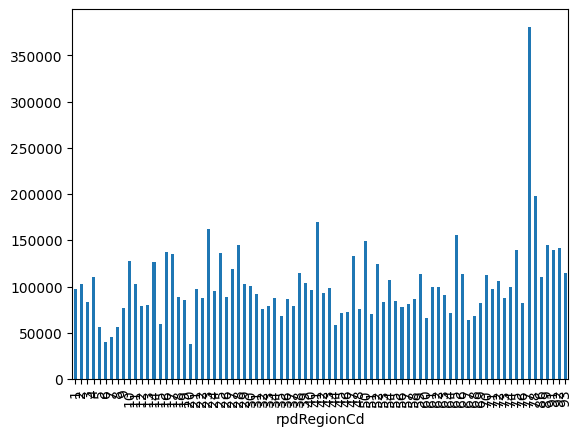

In [14]:
#price_by_region = df[df['objPriceAVG'].notnull()].groupby('rpdRegionCd')['objPriceAVG'].mean()

import matplotlib.pyplot as plt
price_by_region.plot(kind='bar')
plt.show

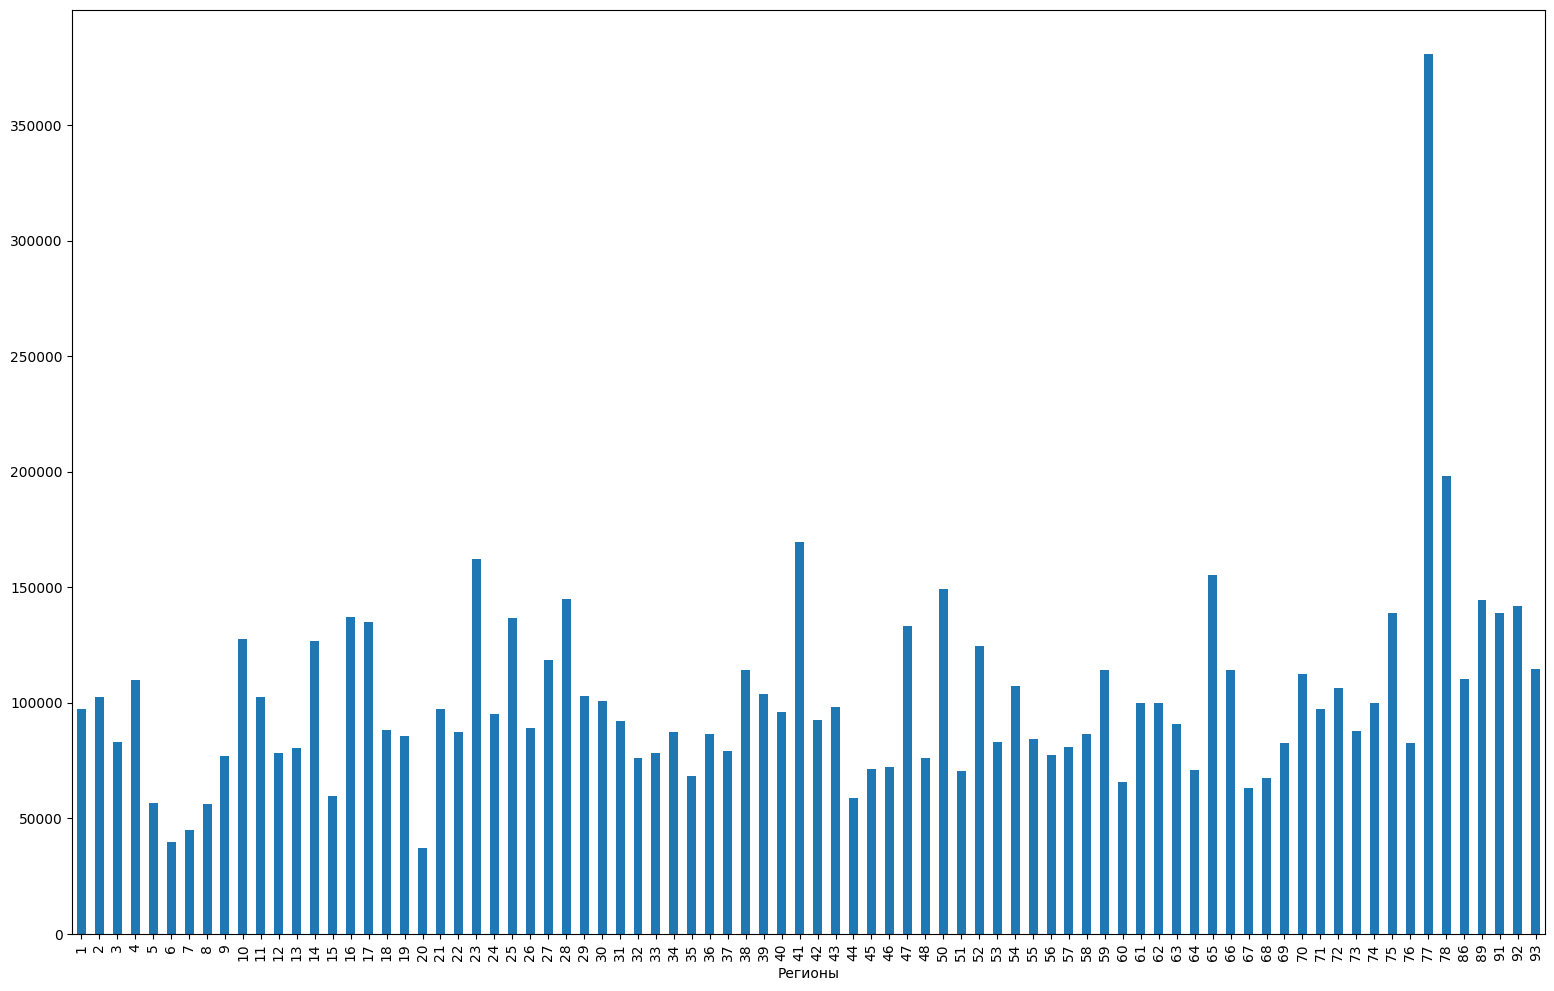

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 19,12
price_by_region.plot(kind='bar')
plt.xlabel('Регионы')
plt.show()

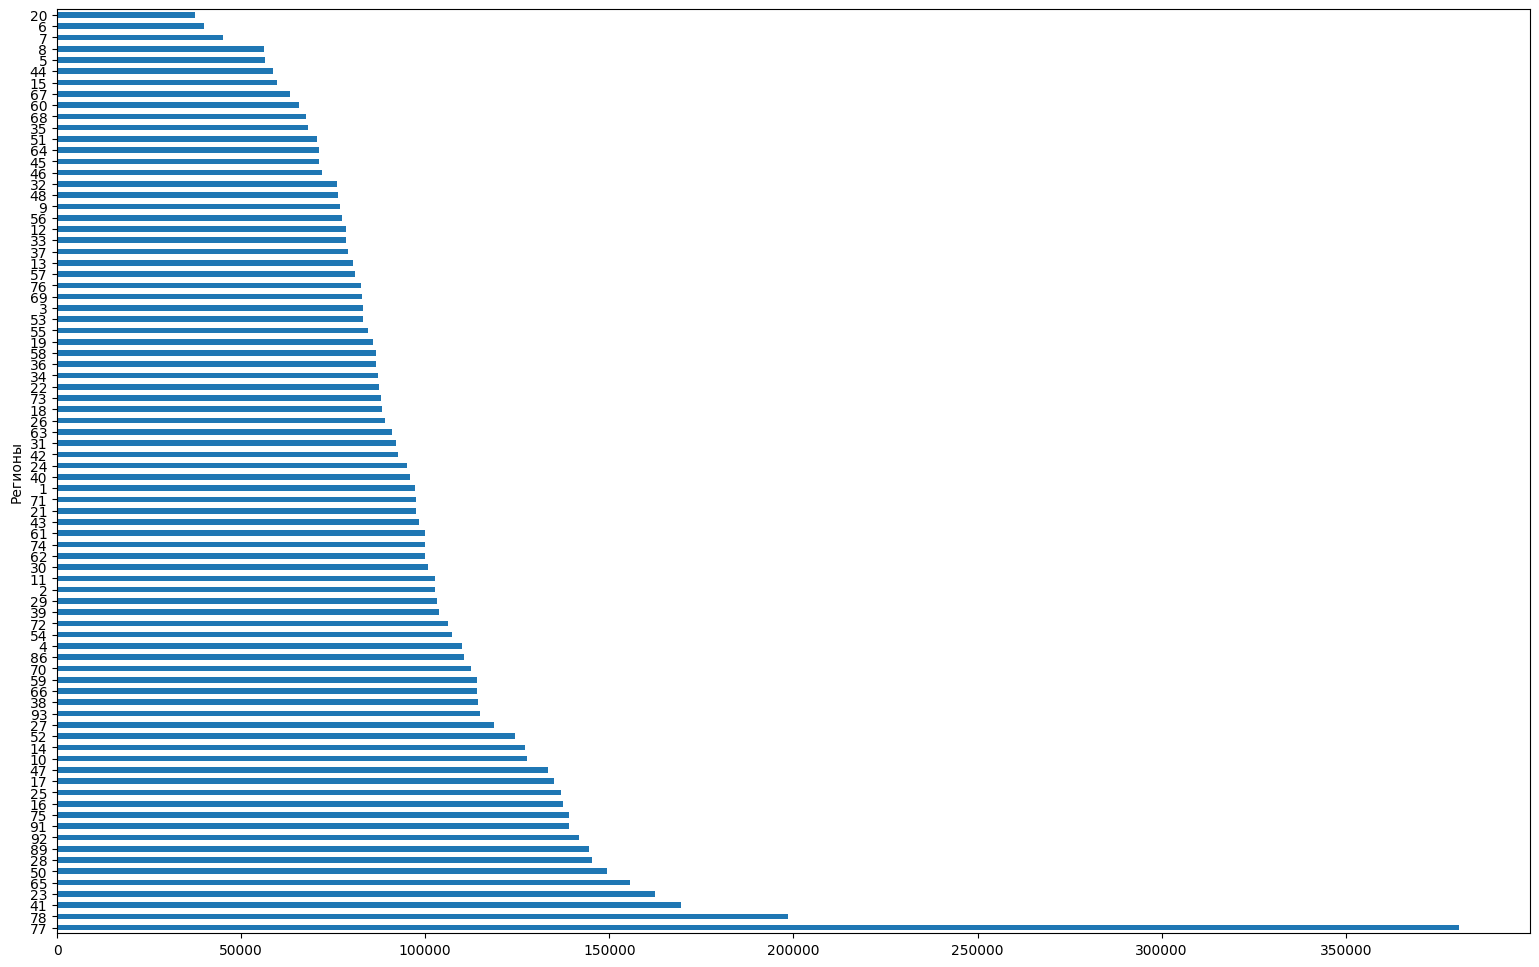

In [28]:
price_by_region.sort_values(ascending=False).plot(kind='barh')
plt.ylabel('Регионы')
plt.show()